# \[ IPD447 \] Tarea \#2: Reconstrucción de Imágenes

**Integrantes:**
- Juan Aguilera     201621028-8
- Mauricio Aravena  201503001-4



## 1. Codificación Poblacional:

In [34]:
# Required dependencies
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import poisson
import pprint
from tabulate import tabulate

# Caso 1: Gaussianas uniformemente distribuidas
###  a) Grafique las curvas de selectividad de las 20 neuronas en un solo gráfico.

Se distribuye de forma uniforme el intervalo [-10,10] los centros $\mu_{i}$ de las Gaussianas (media) generando el vector `u_vector`

In [4]:
u_vector = np.linspace(-10,10,20) # centro/media de la gaussiana
print(u_vector)

[-10.          -8.94736842  -7.89473684  -6.84210526  -5.78947368
  -4.73684211  -3.68421053  -2.63157895  -1.57894737  -0.52631579
   0.52631579   1.57894737   2.63157895   3.68421053   4.73684211
   5.78947368   6.84210526   7.89473684   8.94736842  10.        ]


Se procede a graficar cada una de las Gaussianas, considerando para cada una varianza unitaria ($\sigma_{i} = 1$) y una amplitud de 10. De esta forma la expresión para cada Gaussiana es de la forma:

$$ f_{i}(x) = 10 \cdot e^{\frac{(x-\mu)^{2}}{2}} $$

Dado que se está utilizando la función de distribución normal provista por la biblioteca `scipy`, es necesario utilizar una factor de normalización sobre la expresión para asegurar una amplitud de 10, este factor, denotado en el código como `gaussian_normalization`, tiene un valor de $\sqrt{2\cdot \pi}$.

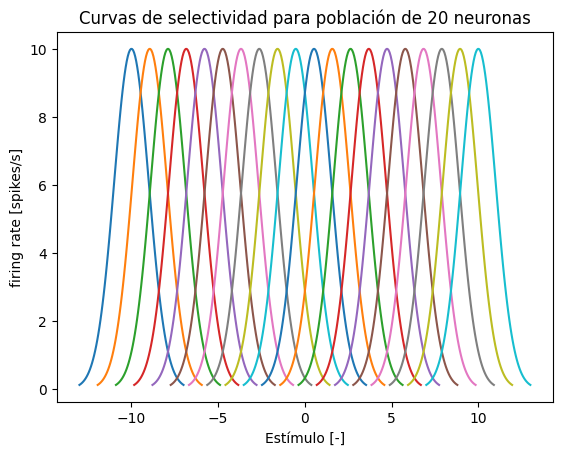

In [5]:
g_vector = np.empty(20, dtype=object) 
i = 0
for u in u_vector:
    mu = u
    variance = 1
    sigma = math.sqrt(variance)
    x_plot = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    gaussian_normalization = math.sqrt(2*np.pi)
    g_vector[i] =  10 * gaussian_normalization * stats.norm.pdf(x_plot, mu, sigma)
    plt.xlabel('Estímulo [-]')
    plt.ylabel('firing rate [spikes/s]')
    plt.title('Curvas de selectividad para población de 20 neuronas')
    plt.plot(x_plot, g_vector[i])
    i += 1  
plt.show()

El gráfico representa la respuesta de la población de neuronas frente a estímulos distribuidos en el vector [-10,10]. Los máximos de la respuesta de la población se alinean con las medias $\mu_{i}$ asociada a la curva de selectividad de cada neurona integrante de la población, esto indica que existen entradas *predilectas* para cada miembro de la población. Note que para estas entradas predilectas, dentro del intervalo de estímulo seleccionado, existirá una mayor tasa de disparo en promedio. 

### b) Sea x una variable aleatoria que distribuye uniformemente en el intervalo [−5, 5].


En primer lugar se genera el vector de las 10 realizaciones de x, denotado en el código como `x_vector`.

In [6]:
x_vector = np.random.uniform(-5,5,10)
print(x_vector)

[-1.94993863 -1.33885475  1.48783179 -2.14332322 -0.88315888  1.00254461
 -0.46072599 -0.04306159  2.84501636 -4.98308344]


Para estimar el vector de respuesta de la población de neuronas `r`, en primer lugar se debe obtener el *firing rate* de cada neurona frente a cada uno de los valores de estímulo $x_{j}$, lo que corresponde a evaluar el estímulo en la curva de selectividad de la neurona $f_{i}(x_{j})$. Cada neurona sigue una distribución de Poisson ($P_{i}(k, \lambda)$):

$$ P_{i}(k,\lambda_{i}) = \frac{\lambda_{i}^{k} \cdot e^{-\lambda_{i}}}{k!} $$

Donde $k$ corresponde al número de disparos (*spikes*) realizados por la neurona i-ésima en el intervalo de tiempo $t$ y $\lambda_{i}$ corresponde a la media de la distribución de poisson en un tiempo $t$, de esta forma $\lambda_{i} = f_{i}(x_{j})*t$. De esta forma, para obtener la respuesta de una neurona i-ésima frente al estímulo se toman muestras aleatorias de la distribución dado el *firing rate* obtenido para cada neurona y el tiempo de realización, de forma que $Y_{j,i}\sim P_{i}(k,f_{i}((x_{j}))$

$$ r[j,i] =  

\begin{pmatrix}
    Y_{1,1} \sim P_{1}(k,f_{1}(x_{1})) & Y_{1,2} \sim  P_{2}(k,f_{2}(x_{1})) & \cdots & Y_{1,20} \sim  P_{20}(k,f_{20}(x_{1})) \\
    \vdots & \vdots & \ddots & \vdots \\ 
    Y_{10,1} \sim  P_{1}(k,f_{1}(x_{10})) & Y_{10,2} \sim  P_{2}(k,f_{2}(x_{10})) & \cdots & Y_{10,20} \sim  P_{20}(k,f_{20}(x_{10}))
\end{pmatrix}


$$

Note que para este caso $r_{10\times20}$.

In [7]:
r = {} 
for x in x_vector: # para cada variablea aleatoria x
    response = np.empty(len(u_vector), dtype=int) 
    i = 0
    for u in u_vector: # calcular la respuesta de cada neurona ( segun su curva de selectividad gausiana que depende de su media u)
        firing_rate = 10*math.exp(-(x-u)**2/2)
        time = 1 # segundo
        response[i] = np.random.poisson(lam=firing_rate*time) # obs: lam: lambda = fi(xi)*t 
        i += 1
    r[x] = response

for x in x_vector:
    print(r[x]) # r[x] implica la cantidad de spikes en cada neurona dada la entrada x

[ 0  0  0  0  0  0  1 15  9  5  0  1  0  0  0  0  0  0  0  0]
[0 0 0 0 0 0 0 3 9 7 4 0 0 0 0 0 0 0 0 0]
[ 0  0  0  0  0  0  0  0  0  2  9 11  2  2  0  0  0  0  0  0]
[ 0  0  0  0  0  1  2 12 11  5  0  0  0  0  0  0  0  0  0  0]
[ 0  0  0  0  0  0  0  3 17 11  2  0  0  0  0  0  0  0  0  0]
[ 0  0  0  0  0  0  0  0  1  3 11  6  3  0  0  0  0  0  0  0]
[0 0 0 0 0 0 0 1 4 6 5 1 0 0 0 0 0 0 0 0]
[ 0  0  0  0  0  0  0  1  4 13 11  1  1  0  0  0  0  0  0  0]
[ 0  0  0  0  0  0  0  0  0  0  1  1 11  6  1  0  0  0  0  0]
[ 0  0  0  1  4 10  3  2  0  0  0  0  0  0  0  0  0  0  0  0]


Note que los resultados del vector `r`, muestra la cantidad de disparos (*spikes*), para cada neurona de la población dada la entrada $x_{i}$. Tomando el estímulo $x_{1}$ como ejemplo, se grafica la cantidad de disparos asociado a cada una de las neuronas de la población y se grafica también las curvas de selectividad asociadas a las neuronas que fueron activadas por el estímulo.

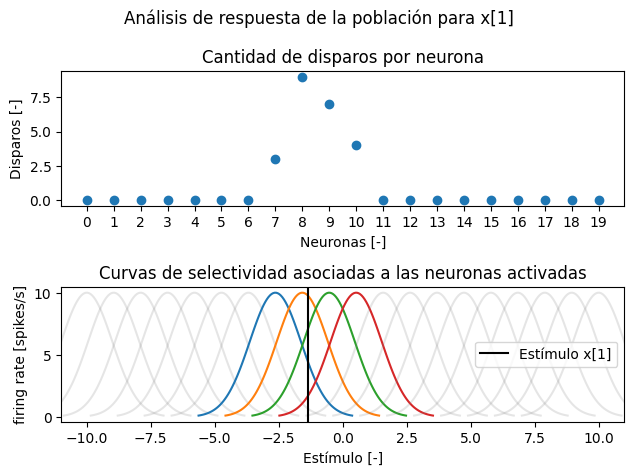

In [38]:
index = 1

fig, axs = plt.subplots(2)
fig.suptitle('Análisis de respuesta de la población para x[1]')

# spikes per neuron
neurons = np.linspace(0,19,20)
axs[0].scatter(neurons, r[x_vector[index]])
axs[0].set_title('Cantidad de disparos por neurona')
axs[0].set(xlabel='Neuronas [-]', ylabel='Disparos [-]')
axs[0].set_xticks(neurons)
#axs[0].grid(True)


# neurons activated

for i, resp in enumerate(r[x_vector[index]]):
    x_plot = np.linspace(u_vector[i] - 3*sigma, u_vector[i] + 3*sigma, 100)
    if(resp):
        axs[1].plot(x_plot,g_vector[i])

    else:
        axs[1].plot(x_plot,g_vector[i],color='gray',alpha=0.2)

axs[1].set_xlim([-11,11])
axs[1].set_title('Curvas de selectividad asociadas a las neuronas activadas')
axs[1].set(xlabel='Estímulo [-]', ylabel='firing rate [spikes/s]')
axs[1].axvline(x=x_vector[index], color='black',label='Estímulo x[1]')
axs[1].legend()

fig.tight_layout()
plt.show()

Como se puede observar en el gráfico, las neuronas cuyas estímulo predilecto esté en la vecindad del estímulo $x[1]$, serán las que se activen y por ende, generen una respuesta. 

### c) Utilizando la información contenida en el vector r, estime el estímulo de entrada:

#### Winner-Take-All Decoding:

*Winner-Takes-All* es un principio donde las neuronas compiten entre sí por lograr la excitación. De esta forma sólo la neurona con la mayor activación frente al estímulo se mantiene activa mientras las otras son inhibidas. Se puede utilizar este concepto para realizar decodificación a partir de las respuestas de las neuronas.

Conociendo las respuestas del conjunto de neuronas frente a un n-ésimo estímulo $r[j=n,i]$ (note que esto corresponde a una fila del vector de respuestas $r$), se puede tomar únicamente la respuesta m-ésima $r_[j=n,i=m]$ que implique el mayor *firing rate* y bajo el concepto de *Winner-Takes-all*, la neurona m-ésima  es la única que ha sido excitada y todas las demás fueron inhibidas. De esta forma, se asume que para que la neurona m-ésima fuese excitada, el estímulo corresponde al valor que máximiza su curva de sensibilidad, como en este caso estamos trabajando con neuronas con curvas de sensibilidad Gaussianas, el éstimulo corresponde a la media de la neurona m-ésima.


$$ m = \argmax_{i} r[j=n,i]  \Longrightarrow \hat{x} = \mu_{m} $$ 


De esta manera, se puede implementar la decoficación de la siguiente forma:



In [28]:
# wta algorithm
def wta(r_n, u_vector):

    # r_n is the row with the neurons response to the stimuly
    # u_vector contains all the center of the sensibility gaussians

    # Get position of highets response value
    r_max_index = np.argmax(r_n)

    # Returns the center of the activated gaussian and the index
    return (r_max_index, u_vector[r_max_index])



Computando los valores decodificados para el vector $r$ se obtiene:

In [45]:
x_hat_wta = {}
for i, r_n in enumerate(r.values()):
    temp = wta(r_n, u_vector)
    relative_error = abs(abs(temp[1]-x_vector[i])/x_vector[i])*100
    x_hat_wta[i] = {'Activated_Neuron':temp[0], 'X_hat':temp[1], 'X':x_vector[i], 'Error':relative_error}


#pp = pprint.PrettyPrinter(indent=4)
#pp.pprint(x_hat_wta)

print(tabulate(x_hat_wta.values(), headers='keys', showindex=True, tablefmt='fancy_grid'))

╒════╤════════════════════╤═══════════╤════════════╤════════════╕
│    │   Activated_Neuron │     X_hat │          X │      Error │
╞════╪════════════════════╪═══════════╪════════════╪════════════╡
│  0 │                  7 │ -2.63158  │ -1.94994   │   34.957   │
├────┼────────────────────┼───────────┼────────────┼────────────┤
│  1 │                  8 │ -1.57895  │ -1.33885   │   17.9327  │
├────┼────────────────────┼───────────┼────────────┼────────────┤
│  2 │                 11 │  1.57895  │  1.48783   │    6.12405 │
├────┼────────────────────┼───────────┼────────────┼────────────┤
│  3 │                  7 │ -2.63158  │ -2.14332   │   22.7803  │
├────┼────────────────────┼───────────┼────────────┼────────────┤
│  4 │                  8 │ -1.57895  │ -0.883159  │   78.7841  │
├────┼────────────────────┼───────────┼────────────┼────────────┤
│  5 │                 10 │  0.526316 │  1.00254   │   47.502   │
├────┼────────────────────┼───────────┼────────────┼────────────┤
│  6 │    